<a href="https://colab.research.google.com/github/bekdata/mohirdev_datascines/blob/main/_032%7Cbarplot_va_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
import seaborn as sns

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/uzbekistan.csv", index_col=0)
df.columns = ['maydon','aholi']
df

,maydon,aholi
Boʻlinishi,,
Andijon viloyati,4200.0,1899000.0
Buxoro viloyati,39400.0,1384700.0
Fargʻona viloyati,6800.0,2597000.0
Jizzax viloyati,20500.0,910500.0
Xorazm viloyati,6300.0,1200000.0
Namangan viloyati,7900.0,1862000.0
Navoiy viloyati,110800.0,767500.0
Qashqadaryo viloyati,28400.0,2029000.0
Qoraqalpogʻiston Respublikasi,160000.0,1200000.0


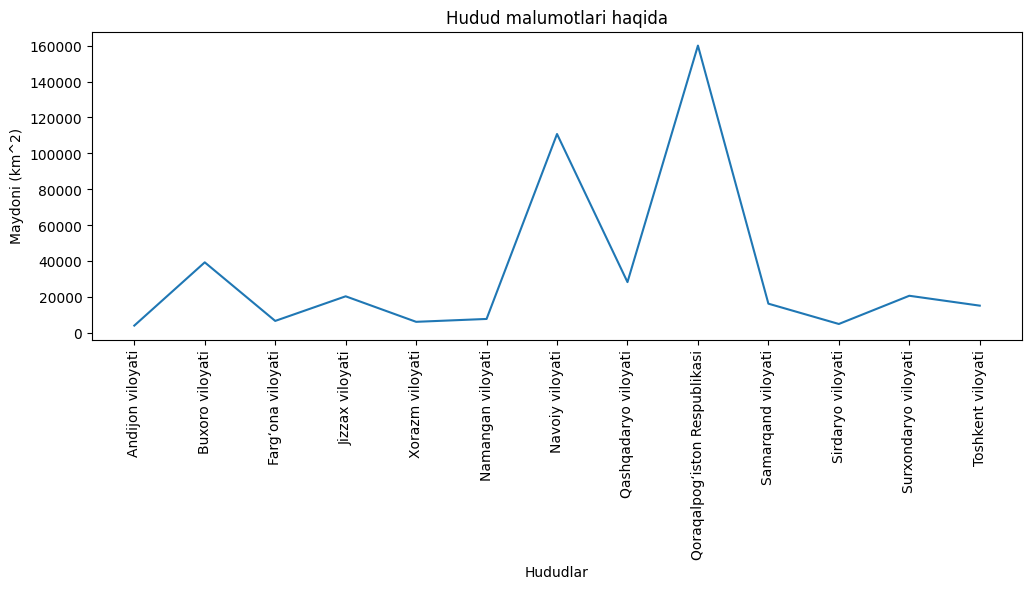

In [24]:
# hudud malumotlarining bog`liqligi
plt.figure(figsize=(12,4))
plt.plot(df.index, df.maydon)
plt.title("Hudud malumotlari haqida")
plt.xticks(rotation=90)
plt.xlabel("Hududlar")
plt.ylabel("Maydoni (km^2)")
plt.show()

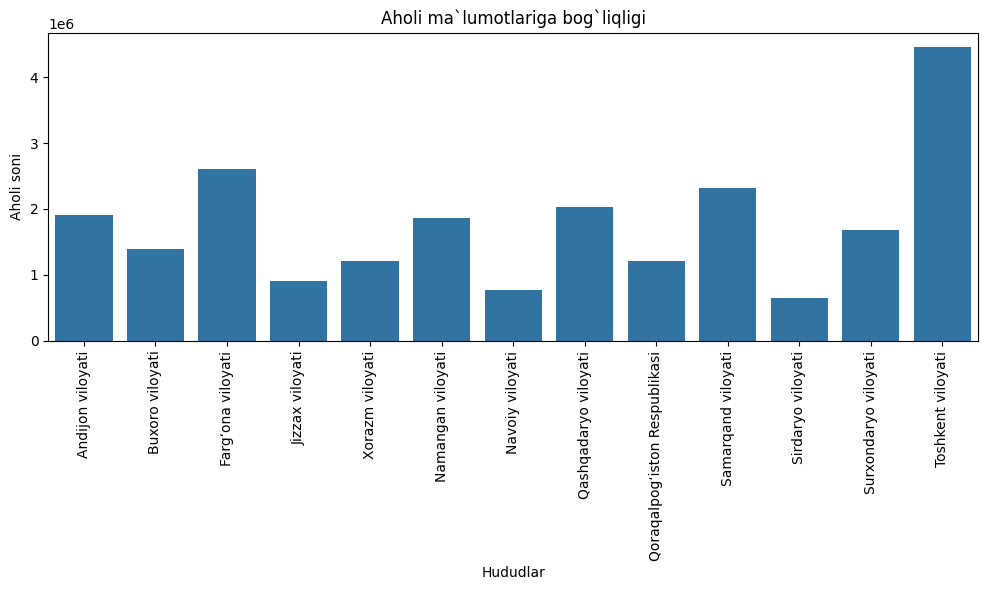

In [26]:
plt.figure(figsize=(12,4))
sns.barplot(x = df.index, y = df.aholi)
plt.title("Aholi ma`lumotlariga bog`liqligi")
plt.xticks(rotation=90)
plt.xlabel("Hududlar")
plt.ylabel("Aholi soni")
plt.show()

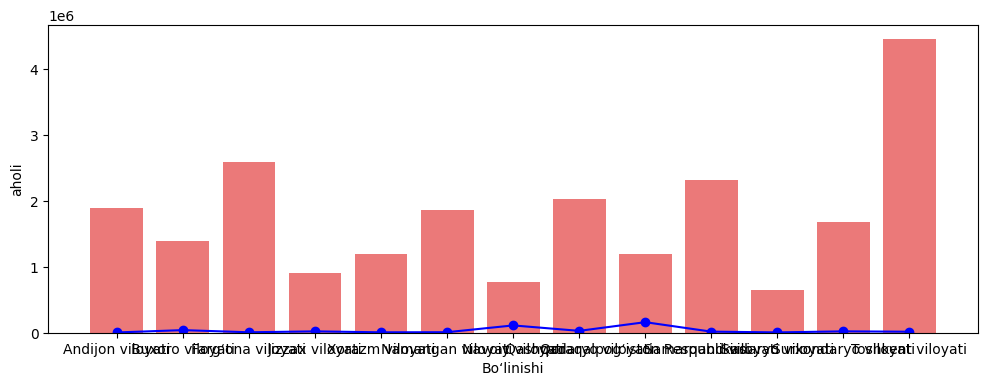

In [31]:
# ikkita ustun birlashmasini chiqarish
plt.figure(figsize=(12,4))
sns.barplot(x=df.index, y=df.aholi, color="red", alpha=0.6)  # Barplot rangini qizil
plt.plot(df.index, df.maydon, color="blue", marker="o", linestyle="-")  # Chiziq grafik rangini ko‘k


# heatmap

In [35]:
df1 = pd.read_csv("https://github.com/anvarnarz/praktikum_datasets/raw/main/museum_visitors.csv", index_col=0, parse_dates=[0], usecols=[0,1])
df1.head()

,Avila Adobe
Date,
2014-01-01,24778
2014-02-01,18976
2014-03-01,25231
2014-04-01,26989
2014-05-01,36883


In [39]:
# dataga [month] ustunini qo`shish
df1['month'] = [i.month for i in df1.index]
df1.head()

,Avila Adobe,month
Date,,
2014-01-01,24778,1
2014-02-01,18976,2
2014-03-01,25231,3
2014-04-01,26989,4
2014-05-01,36883,5


In [41]:
# month va year ustunlarni qo`shishi\
df1['year'] = [i.year for i in df1.index]
df1.head()

,Avila Adobe,month,year
Date,,,
2014-01-01,24778,1,2014
2014-02-01,18976,2,2014
2014-03-01,25231,3,2014
2014-04-01,26989,4,2014
2014-05-01,36883,5,2014


In [42]:
# heatmap uchun ma`lumotlarni tayyorlash
df2 = df1.groupby(['month', 'year']).max()
df2

Avila Adobe
month year             
1     2014        24778
      2015        20438
      2016        19659
      2017        18792
      2018        16265
2     2014        18976
      2015        15578
      2016        17378
      2017        14035
      2018        14718
3     2014        25231
      2015        21297
      2016        20322
      2017        20680
      2018        19001
4     2014        26989
      2015        26670
      2016        24521
      2017        25234
      2018        18966
5     2014        36883
      2015        34383
      2016        31728
      2017        30029
      2018        25173
6     2014        29487
      2015        30569
      2016        23696
      2017        22169
      2018        22171
7     2014        32378
      2015        41242
      2016        31689
      2017        30831
      2018        23136
8     2014        37680
      2015        30700
      2016        25987
      2017        27009
      2018        20815
9     2014        28473
      2015        20967
      2016        22897
      2017        23403
      2018        21020
10    2014        27995
      2015        29764
      2016        25040
      2017        22164
      2018        19280
11    2014        25691
      2015        24483
      2016        17760
      2017        17629
      2018        17163
12    2014        18754
      2015        21426
      2016        20107
      2017        18339

In [45]:
df2.unstack()

Avila Adobe                                    
year         2014     2015     2016     2017     2018
month                                                
1         24778.0  20438.0  19659.0  18792.0  16265.0
2         18976.0  15578.0  17378.0  14035.0  14718.0
3         25231.0  21297.0  20322.0  20680.0  19001.0
4         26989.0  26670.0  24521.0  25234.0  18966.0
5         36883.0  34383.0  31728.0  30029.0  25173.0
6         29487.0  30569.0  23696.0  22169.0  22171.0
7         32378.0  41242.0  31689.0  30831.0  23136.0
8         37680.0  30700.0  25987.0  27009.0  20815.0
9         28473.0  20967.0  22897.0  23403.0  21020.0
10        27995.0  29764.0  25040.0  22164.0  19280.0
11        25691.0  24483.0  17760.0  17629.0  17163.0
12        18754.0  21426.0  20107.0  18339.0      NaN

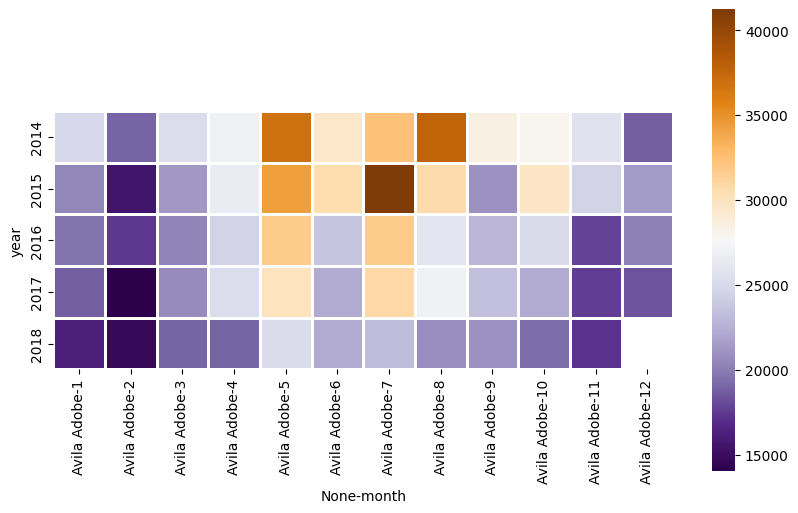

In [64]:
plt.figure(figsize=(10,6))  # Grafik o‘lchamini sozlash
sns.heatmap(df2.unstack(level=0), cmap='PuOr_r', linewidths=1, square=True)  # "camp" emas, "cmap" ishlatish kerak
plt.show()

# BONUS darslar

In [65]:
df = pd.read_csv("https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/flight_delays.csv")
df.head()

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777


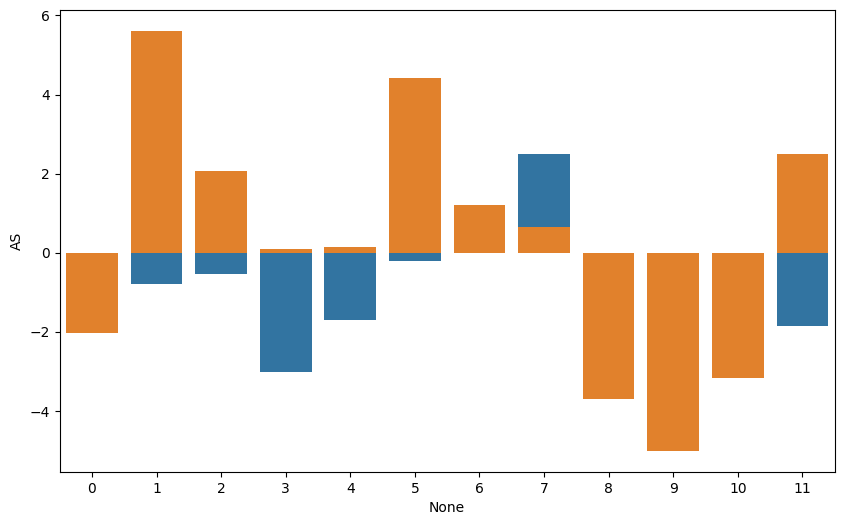

In [72]:
# ikkita ustun ma`lumtlaridagi bog`liqlik
plt.figure(figsize=(10,6))
sns.barplot(x = df.index, y = df['AS'])
sns.barplot(x = df.index, y = df['DL'])
plt.show()

In [73]:
df

,Month,AA,AS,B6,DL,EV,F9,HA,MQ,NK,OO,UA,US,VX,WN
0,1,6.955843,-0.320888,7.347281,-2.043847,8.537497,18.357238,3.512640,18.164974,11.398054,10.889894,6.352729,3.107457,1.420702,3.389466
1,2,7.530204,-0.782923,18.657673,5.614745,10.417236,27.424179,6.029967,21.301627,16.474466,9.588895,7.260662,7.114455,7.784410,3.501363
2,3,6.693587,-0.544731,10.741317,2.077965,6.730101,20.074855,3.468383,11.018418,10.039118,3.181693,4.892212,3.330787,5.348207,3.263341
3,4,4.931778,-3.009003,2.780105,0.083343,4.821253,12.640440,0.011022,5.131228,8.766224,3.223796,4.376092,2.660290,0.995507,2.996399
4,5,5.173878,-1.716398,-0.709019,0.149333,7.724290,13.007554,0.826426,5.466790,22.397347,4.141162,6.827695,0.681605,7.102021,5.680777
5,6,8.191017,-0.220621,5.047155,4.419594,13.952793,19.712951,0.882786,9.639323,35.561501,8.338477,16.932663,5.766296,5.779415,10.743462
6,7,3.870440,0.377408,5.841454,1.204862,6.926421,14.464543,2.001586,3.980289,14.352382,6.790333,10.262551,NaN,7.135773,10.504942
7,8,3.193907,2.503899,9.280950,0.653114,5.154422,9.175737,7.448029,1.896565,20.519018,5.606689,5.014041,NaN,5.106221,5.532108
8,9,-1.432732,-1.813800,3.539154,-3.703377,0.851062,0.978460,3.696915,-2.167268,8.000101,1.530896,-1.794265,NaN,0.070998,-1.336260
9,10,-0.580930,-2.993617,3.676787,-5.011516,2.303760,0.082127,0.467074,-3.735054,6.810736,1.750897,-2.456542,NaN,2.254278,-0.688851


In [80]:
df_long = df.melt(id_vars=["Month"], var_name="Airline", value_name="value")
df_long

,Month,Airline,value
0,1,AA,6.955843
1,2,AA,7.530204
2,3,AA,6.693587
3,4,AA,4.931778
4,5,AA,5.173878
...,...,...,...
163,8,WN,5.532108
164,9,WN,-1.336260
165,10,WN,-0.688851
166,11,WN,0.995684


In [85]:
#..........bundan keyingi kodlar o`xshamay qoldi